# Examples for Bounded Innovation Propagation (BIP) MM ARMA parameter estimation

In [1]:
import numpy as np
import scipy.io as sio
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib

# Fix random number generator for reproducibility
np.random.seed(1) 

## Example 1: AR(1) with 30 percent isolated outliers

In [2]:
# Generate AR(1) observations
N = 300
# a = np.random.randn(n)
a = sio.loadmat('aMM')['aMM'].flatten()
x = sps.lfilter([1],[1,.8],a)
p = 1
q = 0

### Generate isolated Outliers

In [4]:
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.randn(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

In [5]:
a = rsp.robust_starting_point(x_ao,p,q)
np.max(a[1])

58.287719831718015

In [6]:
phi_hat,x_filt,a_scale = rsp.ar_est_bip_s(x_ao, 1)
print(phi_hat)
np.max(x_ao),np.max(x),np.max(x_filt) # max(x_filt) should be closer to max(x) ...

-0.04499999999999915


(238.2364879853079, 4.682137999981019, 58.287719831718015)

In [10]:
# [-.7252] robust_starting_point from matlab
np.max(rsp.bip_s_resid_sc(x_ao,[-.7252],p,q)[1])

85.0426071862368

### BIP MM Estimation

In [4]:
result = rsp.arma_est_bip_mm(x_ao,p,q)

In [29]:
np.array_equal(x_ao,result['cleaned_signal'])

True

In [5]:
res1 = rsp.arma_est_bip_s(x_ao,p,q)
np.array_equal(x_ao,res1['cleaned_signal'])

False

Example: AR(1) with ar_coeff = 0.8
30% of isolated additive outliers
estimaed coefficients: 0.002


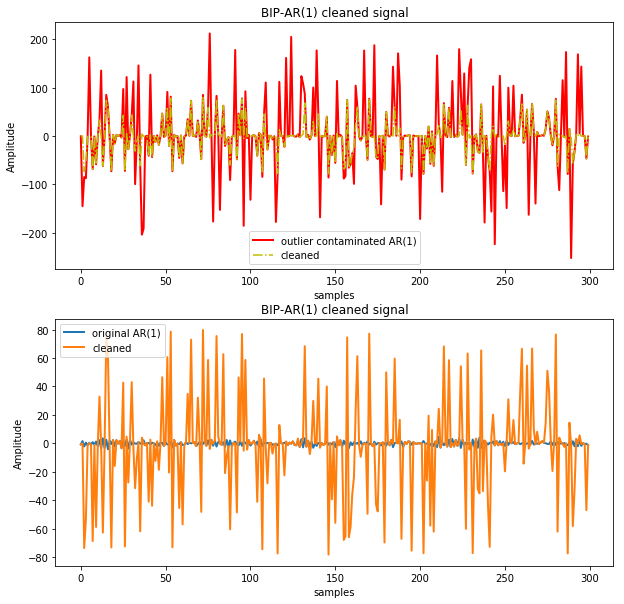

In [6]:
print('Example: AR(1) with ar_coeff = 0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,c='r',label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],lw=2,label='cleaned')
plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
#plt.savefig('arma_mm',format='svg')
plt.show()

In [7]:
np.max(result['cleaned_signal'])

79.70564808778015

![](bip_arma_mm.svg)
![](bip_arma_mm2.svg)
![](bip_arma_mm3.svg)

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it's a note, you don’t have to include the word "Note".
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>